In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [60]:
df =pd.read_csv('data_science_job.csv')

In [61]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [62]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [63]:
df['city_development_index'].value_counts()

0.920    5078
0.624    2619
0.910    1502
0.926    1297
0.698     664
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [64]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [65]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [66]:
df['gender']=df['gender'].map({'Male':1, 'Female':2})

In [12]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,1.0,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,1.0,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,1.0,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,1.0,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,1.0,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,1.0,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,1.0,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [67]:
x= df.drop(columns=['target'])
y=df['target']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [69]:
mean_of_training_hours= x_train['training_hours'].mean()
median_of_training_hours= x_train['training_hours'].median()

mean=x_train['city_development_index'].mean()
median=x_train['city_development_index'].median()


In [88]:
x_train['city_development_index_mean']= x_train['city_development_index'].fillna(mean)


In [89]:
x_train['city_development_index_median']= x_train['city_development_index'].fillna(median)

In [71]:
mean_of_training_hours

65.16179668388149

In [75]:
median_of_training_hours

47.0

In [74]:
x_train['training_hours_mean']= x_train['training_hours'].fillna(mean_of_training_hours)

In [77]:
x_train['training_hours_median']= x_train['training_hours'].fillna(median_of_training_hours)

In [78]:
x_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,training_hours_mean,training_hours_median
7869,31522,city_21,0.624,1.0,Has relevent experience,no_enrollment,Graduate,STEM,2.0,<10,Early Stage Startup,134.0,134.0,134.0
2884,1660,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,No Major,8.0,NaN,NaN,58.0,58.0,58.0
7207,29239,city_103,0.920,1.0,No relevent experience,Full time course,High School,NaN,7.0,NaN,NaN,206.0,206.0,206.0
3807,17343,city_21,0.624,1.0,Has relevent experience,Full time course,Graduate,STEM,0.0,NaN,NaN,28.0,28.0,28.0
1861,9366,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,35.0,35.0,35.0


In [83]:
print('x_train[training_hours_median].var()', x_train['training_hours_median'].var())

x_train[training_hours_median].var() 3474.8349974528187


In [84]:
print('x_train[training_hours].var()', x_train['training_hours'].var())

x_train[training_hours].var() 3605.7523453683752


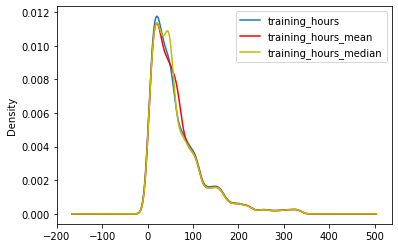

In [87]:
fig=plt.figure()
ax = fig.add_subplot(111)

x_train['city_development_index'].plot(kind='kde', ax=ax)

x_train['training_hours_mean'].plot(kind='kde', ax=ax, color='red')

x_train['training_hours_median'].plot(kind='kde', ax=ax, color='y')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

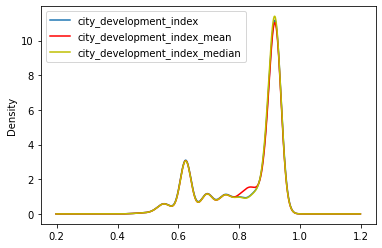

In [90]:
fig=plt.figure()
ax = fig.add_subplot(111)

x_train['city_development_index'].plot(kind='kde', ax=ax)

x_train['city_development_index_mean'].plot(kind='kde', ax=ax, color='red')

x_train['city_development_index_median'].plot(kind='kde', ax=ax, color='y')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [91]:
x_train.cov()

,enrollee_id,city_development_index,gender,experience,training_hours,training_hours_mean,training_hours_median,city_development_index_mean,city_development_index_median
enrollee_id,9.247147e+07,-43.673626,31.627848,-2262.850378,-4152.561254,-3987.271704,-4077.844566,-42.559343,-43.347735
city_development_index,-4.367363e+01,0.015233,0.000491,0.265945,0.045247,0.043455,0.049797,0.015233,0.015233
gender,3.162785e+01,0.000491,0.076618,-0.126409,0.095660,0.091962,0.100787,0.000482,0.000461
experience,-2.262850e+03,0.265945,-0.126409,42.312723,0.923956,0.886609,1.096184,0.259154,0.259576
training_hours,-4.152561e+03,0.045247,0.095660,0.923956,3605.752345,3605.752345,3605.752345,0.044102,0.039276
training_hours_mean,-3.987272e+03,0.043455,0.091962,0.886609,3605.752345,3462.228108,3462.228108,0.042347,0.037712
training_hours_median,-4.077845e+03,0.049797,0.100787,1.096184,3605.752345,3462.228108,3474.834997,0.048527,0.044294
city_development_index_mean,-4.255934e+01,0.015233,0.000482,0.259154,0.044102,0.042347,0.048527,0.014844,0.014844
city_development_index_median,-4.334773e+01,0.015233,0.000461,0.259576,0.039276,0.037712,0.044294,0.014844,0.014981


In [92]:
x_train.corr()

,enrollee_id,city_development_index,gender,experience,training_hours,training_hours_mean,training_hours_median,city_development_index_mean,city_development_index_median
enrollee_id,1.000000,-0.036824,0.011625,-0.036155,-0.007193,-0.007047,-0.007194,-0.036326,-0.036829
city_development_index,-0.036824,1.000000,0.015090,0.331741,0.006114,0.005980,0.006840,1.000000,1.000000
gender,0.011625,0.015090,1.000000,-0.070497,0.005747,0.005651,0.006183,0.015015,0.014314
experience,-0.036155,0.331741,-0.070497,1.000000,0.002366,0.002317,0.002860,0.327284,0.326315
training_hours,-0.007193,0.006114,0.005747,0.002366,1.000000,1.000000,1.000000,0.006042,0.005356
training_hours_mean,-0.007047,0.005980,0.005651,0.002317,1.000000,1.000000,0.998184,0.005907,0.005236
training_hours_median,-0.007194,0.006840,0.006183,0.002860,1.000000,0.998184,1.000000,0.006757,0.006139
city_development_index_mean,-0.036326,1.000000,0.015015,0.327284,0.006042,0.005907,0.006757,1.000000,0.995405
city_development_index_median,-0.036829,1.000000,0.014314,0.326315,0.005356,0.005236,0.006139,0.995405,1.000000


<AxesSubplot: >

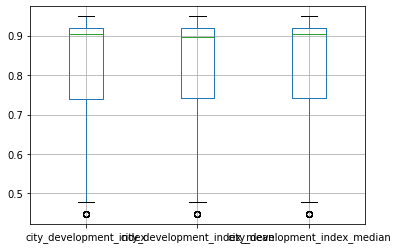

In [93]:
x_train[['city_development_index', 'city_development_index_mean','city_development_index_median']].boxplot()

In [94]:
##using sklearn fill the null values 

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [96]:
inputation_1= SimpleImputer(strategy='mean')
inputation_2= SimpleImputer(strategy='median')

In [97]:
trf = ColumnTransformer([('inputation_1', inputation_1,['city_development_index']),
                        ('inputation_2',inputation_2,['training_hours'])], remainder='passthrough')

In [98]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('inputation_1', SimpleImputer(),
                                 ['city_development_index']),
                                ('inputation_2',
                                 SimpleImputer(strategy='median'),
                                 ['training_hours'])])

In [99]:
trf.named_transformers_['inputation_1'].statistics_

array([0.82867238])

In [100]:
trf.named_transformers_['inputation_2'].statistics_

array([47.])

In [101]:
x_train['city_development_index'].mean()

0.828672380314702

In [102]:
x_test=trf.transform(x_test)
x_train=trf.transform(x_train)

In [107]:
x_train[0]

array([0.624, 134.0, 31522, 'city_21', 1.0, 'Has relevent experience',
       'no_enrollment', 'Graduate', 'STEM', 2.0, '<10',
       'Early Stage Startup'], dtype=object)